<a href="https://colab.research.google.com/github/DivinitasMaxima/BINA-REPO/blob/main/3_Daten_sammeln.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<h1 style="color: black; text-align: left;"><b>3. Daten sammeln</b></h1>
<p style="font-size: 16px; line-height: 1.5;">
Eine systematische und strukturierte Datensammlung ist der Grundstein für die spätere Analyse und Entscheidungsfindung. Im folgenden Kapitel werden die verschiedenen Aspekte des Datenbeschaffungsprozesses behandelt.
</p>
<h2 style="color: black; text-align: left;"><b>3.1. Einleitung</b></h2>
<p style="font-size: 16px; line-height: 1.5;">
Invistico Airlines hat AeroMarketing Solutions AG beauftragt, datenbasierte Erkenntnisse über die Kundenzufriedenheit und deren Einflussfaktoren zu gewinnen. Ziel ist es, auf dieser Grundlage wirksame Strategien zur Verbesserung des Reiseerlebnisses zu entwickeln und sich im wettbewerbsintensiven Luftverkehrsmarkt nachhaltig zu positionieren.

Da Invistico Airlines keine eigenen historischen Kundendaten oder umfassenden operativen Statistiken zur Verfügung stellt, greift AeroMarketing für die Analyse auf öffentlich zugängliche, anonymisierte Datensätze zurück. Die Plattform Kaggle (o.J.) bietet hierfür eine geeignete Grundlage, da sie eine Vielzahl strukturierter Daten im Bereich Luftfahrt zur Verfügung stellt. Die ausgewählten Datensätze bilden eine modellhafte Datenbasis, um zentrale Einflussfaktoren zu identifizieren und relevante Muster und Zusammenhänge im Kontext von Flugreisen zu analysieren.

Die folgenden Datenquellen werden für die Analyse herangezogen:

*   [Kundenzufriedenheitsumfrage Invistico Airline](https://www.kaggle.com/datasets/sjleshrac/airlines-customer-satisfaction/data)
*   [Flugverspätungen](https://www.kaggle.com/datasets/ulrikthygepedersen/airlines-delay/code)
*   [Grösste Flughäfen nach Passagieraufkommen (2016 - 2020)](https://www.kaggle.com/datasets/khaiid/most-crowded-airports)
*   [Distanz zwischen Flughäfen](https://www.transtats.bts.gov/Distance.aspx)

</p>
<hr>
<h2 style="color: black; text-align: left;"><b>3.2. Datenqualität und -bereinigung</b></h2>
<h3 style="color: black; text-align: left;"><b>Primärer Datensatz</b></h3>
<p style="font-size: 16px; line-height: 1.5;">
Um datenbasierte Erkenntnisse über die Zufriedenheit der Passagiere zu gewinnen wurde der Datensatz "Kundenzufriedenheitsumfrage Invistico Airline" geladen. Ein Ziel der Analyse ist es, die wichtigsten Einflussfaktoren auf die Kundenzufriedenheit zu identifizieren, und daraus konkrete Optimierungsmassnahmen für die Airline abzuleiten. Der genannte Datensatz enthält dabei über 100'000 Kundenbewertungen mit folgenden Informationen:
</p>


| Spalte  | Beschreibung  |
|-----------|-----------|
| satisfaction    | satisfied / unsatisfied    |
| Gender  | male / female    |
| Customer Type | Loyal Customer / disloyal Customer |
| Age    | #    |
| Type of Travel    | Personal Travel / Business Travel    |
| Class    | Business / Eco / Other    |
| Flight Distance    | # in Meilen    |
| Seat comfort    | 1 - 5    |
| Departure/Arrival time convenient    | 1 - 5    |
| Food and drink   | 1 - 5    |
| Gate location   | 1 - 5    |
| Inflight wifi service   | 1 - 5    |
| Inflight entertainment   | 1 - 5   |
| Online support   | 1 - 5   |
| Ease of Online booking   | 1 - 5    |
| On-board service   | 1 - 5    |
| Leg room service   | 1 - 5    |
| Baggage handling   | 1 - 5    |
| Checkin service   | 1 - 5    |
| Cleanliness   | 1 - 5    |
| Online boarding   | 1 - 5    |
| Departure Delay in Minutes   | # in Min    |
| Arrival Delay in Minutes   | # in Min    |



<h3 style="color: black; text-align: left;"><b>Sekundäre Datensätze</b></h3>
<p style="font-size: 16px; line-height: 1.5;">
Um weitere Faktoren von Flugverspätungen zu identifizieren, wird der Datensatz <b>Flugverspätungen</b> aus der Luftfahrtbranche herangezogen, der Flugdaten von verschiedenen Airlines umfasst. Dieser Datensatz enthält wichtige Variablen, die es ermöglichen, Muster und Zusammenhänge zwischen unterschiedlichen Einflussfaktoren und der Pünktlichkeit der Flüge zu erkennen.
</p>

| Spalte  | Beschreibung  |
|-----------|-----------|
| Flight ID| # ||
| Time  | # in Min   |    
| Length | # in Min |    
| Airline    |  Airline ID |   
| AirportFrom    |  Abflughafen-Code |    
| AirportTo    |  Zielflughafen-Code   |  
| DayOfWeek    | Wochentag (1-7)  |  
| Class    | 0 / 1  |  

<p style="font-size: 16px; line-height: 1.5;">
Für die Analyse wurden zusätzlich zu den Flugverspätungsdaten auch Daten zu den grössten Flughäfen herangezogen. Der Datensatz <b>Grösste Flughäfen nach Passagieraufkommen (2016 - 2020)</b> umfasst Informationen über das Passagieraufkommen der grössten Flughäfen zwischen 2016 und 2020 und liefert wertvolle Einblicke in die regionalen Unterschiede, die potenziell Einfluss auf Flugverspätungen und Kundenzufriedenheit haben können.
</p>

| Spalte  | Beschreibung |
|-----------|-----------|
| Rank    | # Airport ranking for that year   |
| Airport  | Airport name   |      
| Location | Airport Location |     
| Country    | Airport country  |     
| Code    | Code of the airport (IATA/ICAO)  |     
| Class    | Business / Eco / Other    |    
| Passengers | # Total number of passengers  |    
| Year   | # Year of ranking  |    


<p style="font-size: 16px; line-height: 1.5;">
Um den Einfluss der Entfernungen zwischen Flughäfen näher zu untersuchen wurden Daten zu <b>Distanzen zwischen Flughäfen</b> aus dem Bureau of Transportation Statistics herangezogen.
</p>

| Spalte  | Beschreibung |
|-----------|-----------|
| ORIGIN  | IATA Abflughafen-Code   |
| ORIGIN_AIRPORT_SEQ_ID | Abflugs ID  |      
| DEST | IATA Zielflughafen-Code |
| DEST_AIRPORT_SEQ_ID | Ankunfts ID |
| DISTANCE IN MILES | Distanzen in Meilen |        



<h3 style="color: black; text-align: left;"><b>Import der Datensätze</b></h3>
Zuerst werden alle Datensätze aus Kaggle und heruntergeladene Dateien geladen.

In [10]:
# Datensätze von Kaggle herunterladen
import pandas as pd
import kagglehub
from kagglehub import KaggleDatasetAdapter
import warnings
warnings.filterwarnings("ignore")

file_path_zufriedenheit = "Invistico_Airline.csv"
file_path_airlines_delay = "airlines_delay.csv"
file_path_crowded_airports = "Airports.csv"

# Kundenzufriedenheit
df_zufriedenheit = kagglehub.load_dataset(
  KaggleDatasetAdapter.PANDAS,
  "sjleshrac/airlines-customer-satisfaction",
  file_path_zufriedenheit,
)

# Verspätungen
df_airlines_delay = kagglehub.load_dataset(
  KaggleDatasetAdapter.PANDAS,
  "ulrikthygepedersen/airlines-delay",
  file_path_airlines_delay,
)

# Flughäfen
df_crowded_airports = kagglehub.load_dataset(
    KaggleDatasetAdapter.PANDAS,
    "khaiid/most-crowded-airports",
    file_path_crowded_airports,
)

# Distanzen - Diese Daten sind bereinigt und vollständig
url = "https://raw.githubusercontent.com/DivinitasMaxima/BINA-REPO/refs/heads/main/data/data/Distance_of_All_Airports.csv"
df_distance_ap = pd.read_csv(url)

100%|██████████| 1.64M/1.64M [00:00<00:00, 112MB/s]

Extracting zip of Invistico_Airline.csv...


100%|██████████| 5.85M/5.85M [00:00<00:00, 85.3MB/s]

Extracting zip of airlines_delay.csv...


100%|██████████| 26.1k/26.1k [00:00<00:00, 24.7MB/s]


<h3 style="color: black; text-align: left;"><b>Datenbereinigung</b></h3>
<p>
<h4 style="color: black; text-align: left;">Leere Einträge</h4>
<p style="font-size: 16px; line-height: 1.5;">
Vor der eigentlichen Analyse wurden die Daten sorgfältig bereinigt und aufbereitet. Dies geschah, um möglichst zuverlässige und aussagekräftige Ergebnisse zu erhalten. So wurde zunächst geprüft, ob eventuell fehlende Werte im Datensatz vorhanden waren, um diese zu entfernen.
</p>

In [11]:
# Analyse von fehlenden Daten in allen Datensätzen
print('-----df_zufriedenheit-----')
print(df_zufriedenheit.isnull().sum())
print('-----df_airlines_delay-----')
print(df_airlines_delay.isnull().sum())
print('-----df_crowded_airports-----')
print(df_crowded_airports.isnull().sum())

# Wenn man möchte, kann man sich hier die fehlenden Werte anzeigen lassen
# df_zufriedenheit[df_zufriedenheit.isnull().any(axis=1)]



-----df_zufriedenheit-----
satisfaction                           0
Gender                                 0
Customer Type                          0
Age                                    0
Type of Travel                         0
Class                                  0
Flight Distance                        0
Seat comfort                           0
Departure/Arrival time convenient      0
Food and drink                         0
Gate location                          0
Inflight wifi service                  0
Inflight entertainment                 0
Online support                         0
Ease of Online booking                 0
On-board service                       0
Leg room service                       0
Baggage handling                       0
Checkin service                        0
Cleanliness                            0
Online boarding                        0
Departure Delay in Minutes             0
Arrival Delay in Minutes             393
dtype: int64
-----df_airlines_

<p style="font-size: 16px; line-height: 1.5;">
Erste Analysen zeigen, dass die Anzahl leerer Einträge vernachlässigbar gering ist. Daher sollten diese nicht durch den Durchschnittswert ersetzt, sondern vollständig entfernt werden.
</p>
<h4 style="color: black; text-align: left;">Doppelte Einträge</h4>
<p style="font-size: 16px; line-height: 1.5;">
Vor der Analyse ist es ebenfalls notwendig Datensätze auf doppelte Einträge zu prüfen und diese auf fehlerhafte Einträge zu überprüfen.
</p>

In [12]:
# Analyse von doppelten Einträgen in allen Datensätzen
duplicates_zufriedenheit = df_zufriedenheit[df_zufriedenheit.duplicated()]
print('-----df_zufriedenheit-----')
print(f"Anzahl der doppelten Zeilen: {duplicates_zufriedenheit.shape[0]}")
# duplicates_zufriedenheit
print('-----df_airlines_delay-----')
duplicates_airlines_delay = df_airlines_delay[df_airlines_delay.duplicated()]
print(f"Anzahl der doppelten Zeilen: {duplicates_airlines_delay.shape[0]}")
# Wenn man möchte, kann man sich hier die doppelten Werte anzeigen lassen
# duplicates_airlines_delay
print('-----df_crowded_airports-----')
duplicates_crowded_airports = df_crowded_airports[df_crowded_airports.duplicated()]
print(f"Anzahl der doppelten Zeilen: {duplicates_crowded_airports.shape[0]}")
# duplicates_crowded_airports

-----df_zufriedenheit-----
Anzahl der doppelten Zeilen: 0
-----df_airlines_delay-----
Anzahl der doppelten Zeilen: 216618
-----df_crowded_airports-----
Anzahl der doppelten Zeilen: 0


<p style="font-size: 16px; line-height: 1.5;">
Nach der Überprüfung der Datensätze konnte im Datensatz Delay keine falschen Einträge gefunden werden. Bei den doppelten Einträgen handelte es sich um gleiche Abflugs- und Ankunftsorte. Aus diesem Grund kann von einer Bereinigung abgesehen werden.
</p>
<h4 style="color: black; text-align: left;">Statistische Ausreisser</h4>
<p style="font-size: 16px; line-height: 1.5;">
Nach der Übeprüfung von doppelten Einträgen müssen Ausreisser näher betrachtet werden.
</p>

In [13]:
# Analyse von statistischen Ausreissern
print('-----df_zufriedenheit-----')
print(df_zufriedenheit.describe())
print('-----df_airlines_delay-----')
print(df_airlines_delay.describe())
print('-----df_crowded_airports-----')
print(df_crowded_airports.describe())

-----df_zufriedenheit-----
                 Age  Flight Distance   Seat comfort  \
count  129880.000000    129880.000000  129880.000000   
mean       39.427957      1981.409055       2.838597   
std        15.119360      1027.115606       1.392983   
min         7.000000        50.000000       0.000000   
25%        27.000000      1359.000000       2.000000   
50%        40.000000      1925.000000       3.000000   
75%        51.000000      2544.000000       4.000000   
max        85.000000      6951.000000       5.000000   

       Departure/Arrival time convenient  Food and drink  Gate location  \
count                      129880.000000   129880.000000  129880.000000   
mean                            2.990645        2.851994       2.990422   
std                             1.527224        1.443729       1.305970   
min                             0.000000        0.000000       0.000000   
25%                             2.000000        2.000000       2.000000   
50%               

<p style="font-size: 16px; line-height: 1.5;">
Zu den Ausreissern konnten folgende Erkenntnisse gemacht werden:

Kundenzufriedenheit
<ol>
    <li>Alter: Die Ausreisser im Minimum Bereich bedeuten, dass Kinder ebenfalls an der Umfrage teilgenommen haben, was einerseits ungewöhnlich ist und andererseits irrelevant als Zielgruppe.</li>
    <li>Flugdistanzen: Im Maximalbereich finden sich Werte welche für Inlandsflüge unmöglich erscheinen (bswp. Singapur - New York: 9500 Meilen).</li>
    <li>Abflugsverspätungen: Bei Verspätungen von über 24h könnte es sich um einen Fehler handeln.</li>
</ol>

Flugverspätungen
<ol>
    <li>Flugdauer: Eine Dauer von 11 Stunden ist eher ein Langstreckenflug</li>
</ol>

Überfüllte Flughäfen
<ol>
    <li>Passagierzahlen: Passagierzahlen wird angegeben, dass es sich im Maximum um 110 Millionnen handelt, dies könnte auf fehlerhafte Daten hinweisen.</li>
</ol>

</p>


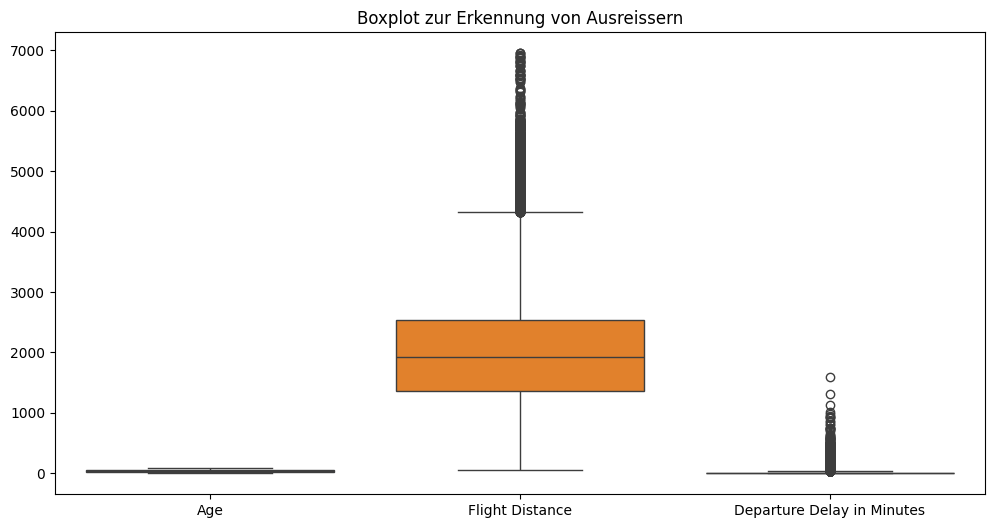

In [14]:
# Visualisierung von Aussreissern
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

plt.figure(figsize=(12, 6))
sns.boxplot(data=df_zufriedenheit[["Age", "Flight Distance", "Departure Delay in Minutes"]])
plt.title("Boxplot zur Erkennung von Ausreissern")
plt.show()


<p style="font-size: 16px; line-height: 1.5;">
Die beschriebenen Ausreissern werden in den nächsten Schritten näher betrachtet und bewertet. Das Ergebnis soll definieren, ob diese Daten in die finale Auswertung einfliessen sollen oder nicht.
</p>


In [15]:
# Das Alter näher analysieren
df_filtered_1 = df_zufriedenheit.loc[
    (df_zufriedenheit["Age"].between(0, 17)) &
    #(df_zufriedenheit["Flight Distance"].between(1000, 3000))
    (df_zufriedenheit["Class"] == "Business")
]
display(df_filtered_1)

# Die Flugdistanz näher betrachten
df_filtered_2 = df_zufriedenheit.loc[
    (df_zufriedenheit["Flight Distance"] > 4500)
]
display(df_filtered_2)

# Verspätungen näher analysieren
df_filtered_3 = df_zufriedenheit.loc[
    (df_zufriedenheit["Departure Delay in Minutes"] > 1441)
]
display(df_filtered_3)

,satisfaction,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Seat comfort,Departure/Arrival time convenient,Food and drink,...,Online support,Ease of Online booking,On-board service,Leg room service,Baggage handling,Checkin service,Cleanliness,Online boarding,Departure Delay in Minutes,Arrival Delay in Minutes
107,satisfied,Male,Loyal Customer,10,Personal Travel,Business,3432,0,2,0,...,4,4,1,4,3,1,4,4,1,0.0
193,satisfied,Male,Loyal Customer,15,Personal Travel,Business,1583,0,3,0,...,2,2,4,4,2,4,3,2,0,0.0
250,satisfied,Female,Loyal Customer,10,Personal Travel,Business,3490,0,3,0,...,3,3,3,3,1,4,1,3,1,0.0
394,satisfied,Male,Loyal Customer,9,Personal Travel,Business,1630,0,4,0,...,1,1,1,5,3,4,4,1,0,0.0
397,satisfied,Female,Loyal Customer,12,Personal Travel,Business,1813,0,4,0,...,1,1,2,5,4,3,3,1,14,44.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
129299,satisfied,Male,Loyal Customer,16,Business travel,Business,2215,5,5,5,...,5,5,3,2,4,3,5,5,0,0.0
129730,dissatisfied,Male,disloyal Customer,12,Personal Travel,Business,3950,3,4,3,...,5,5,1,1,3,3,4,5,87,84.0
129789,dissatisfied,Female,disloyal Customer,10,Personal Travel,Business,1625,1,4,1,...,3,4,2,5,5,5,2,4,1,9.0
129804,dissatisfied,Female,disloyal Customer,10,Personal Travel,Business,3341,2,2,2,...,4,4,1,1,2,2,3,4,0,0.0


,satisfaction,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Seat comfort,Departure/Arrival time convenient,Food and drink,...,Online support,Ease of Online booking,On-board service,Leg room service,Baggage handling,Checkin service,Cleanliness,Online boarding,Departure Delay in Minutes,Arrival Delay in Minutes
145,satisfied,Female,Loyal Customer,21,Personal Travel,Eco,4804,0,2,0,...,5,5,4,1,4,2,3,5,20,NaN
540,satisfied,Female,Loyal Customer,13,Personal Travel,Eco,6792,0,5,0,...,1,3,4,5,5,1,3,1,3,0.0
588,satisfied,Female,Loyal Customer,63,Personal Travel,Business,6591,0,5,0,...,1,3,2,4,3,1,5,1,3,0.0
1160,dissatisfied,Male,Loyal Customer,35,Personal Travel,Eco,6470,1,1,1,...,3,1,2,2,2,3,2,3,0,32.0
1161,dissatisfied,Female,Loyal Customer,38,Personal Travel,Eco,5322,1,1,1,...,4,2,4,2,2,4,2,4,0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
129402,satisfied,Female,Loyal Customer,23,Business travel,Business,4857,1,1,1,...,5,5,4,4,4,4,5,5,0,0.0
129420,satisfied,Male,Loyal Customer,45,Business travel,Business,5120,2,2,2,...,5,4,3,5,4,5,5,5,139,134.0
129528,satisfied,Female,Loyal Customer,22,Business travel,Business,4652,3,3,3,...,5,5,4,3,4,3,5,5,0,0.0
129580,satisfied,Female,Loyal Customer,42,Business travel,Business,5403,1,1,1,...,5,5,5,5,4,5,4,5,189,153.0


,satisfaction,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Seat comfort,Departure/Arrival time convenient,Food and drink,...,Online support,Ease of Online booking,On-board service,Leg room service,Baggage handling,Checkin service,Cleanliness,Online boarding,Departure Delay in Minutes,Arrival Delay in Minutes
9704,dissatisfied,Female,Loyal Customer,47,Personal Travel,Eco,3113,2,2,2,...,2,2,4,4,4,2,3,2,1592,1584.0


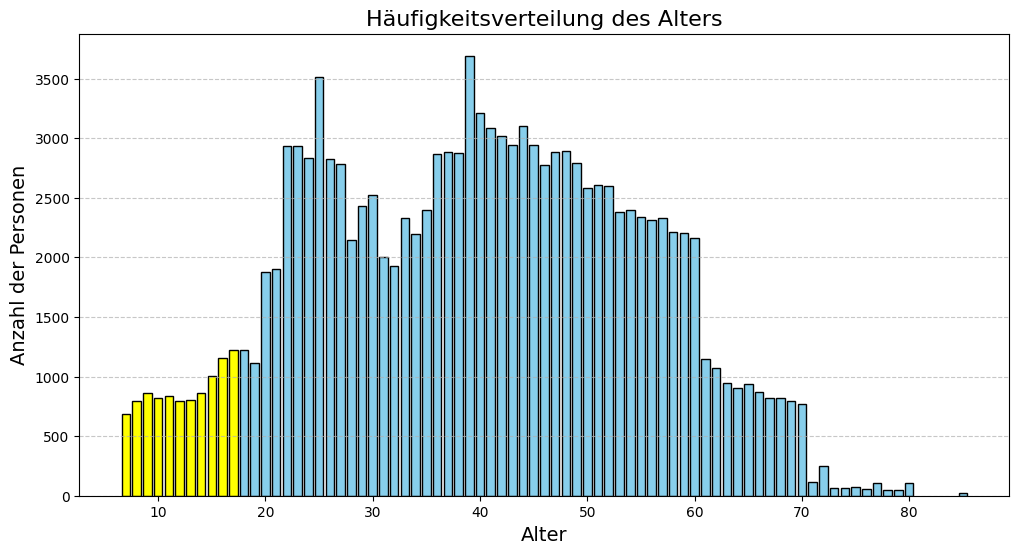

In [16]:
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

# Altersverteilung berechnen
age_counts = df_zufriedenheit["Age"].value_counts().sort_index()

# Farben definieren: Gelb für 0–17 Jahre, Blau für alle anderen
colors = ["yellow" if age <= 17 else "skyblue" for age in age_counts.index]

# Balkendiagramm erstellen
plt.figure(figsize=(12, 6))
plt.bar(age_counts.index, age_counts.values, color=colors, edgecolor="black")

# Titel und Achsenbeschriftungen
plt.title("Häufigkeitsverteilung des Alters", fontsize=16)
plt.xlabel("Alter", fontsize=14)
plt.ylabel("Anzahl der Personen", fontsize=14)

# Layout anpassen und anzeigen
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.show()

In [17]:
# Die Flugdauer näher analysieren
df_filtered_4 = df_airlines_delay.loc[
    (df_airlines_delay["Time"] > 660)
]
display(df_filtered_4)

,Flight,Time,Length,Airline,AirportFrom,AirportTo,DayOfWeek,Class
0,2313.0,1296.0,141.0,DL,ATL,HOU,1,0
2,1247.0,1170.0,143.0,B6,BOS,CLT,3,0
3,31.0,1410.0,344.0,US,OGG,PHX,6,0
4,563.0,692.0,98.0,FL,BMI,ATL,4,0
6,1135.0,690.0,239.0,CO,EWR,DFW,4,0
...,...,...,...,...,...,...,...,...
539373,865.0,1240.0,154.0,US,PHL,MCO,7,1
539374,1460.0,933.0,158.0,FL,MCO,MDW,3,1
539379,5209.0,827.0,74.0,EV,CAE,ATL,2,1
539380,607.0,715.0,65.0,WN,BWI,BUF,4,1


In [18]:
# Die Flugdauer näher analysieren
df_filtered_5 = df_crowded_airports.loc[
    (df_crowded_airports["Passengers"] > 110000000)
]
display(df_filtered_5)

,Rank,Airport,Location,Country,Code,Passengers,Year
50,1,United States Hartsfield–Jackson Atlanta Inter...,"Atlanta, Georgia",United States,ATL/KATL,110531300,2019


<h3 style="color: black; text-align: left;"><b>Ergebnisse</b></h3>
<p style="font-size: 16px; line-height: 1.5;">

<b>Leere Einträge</b> konnten bereinigt werden. Es handelte sich dabei um verhältnismässig wenige Datensätze, weshalb die leeren Einträge gelöscht werden konnten.
- [x] df_zufriedenheit
- [x] df_airlines_delay
- [x] df_crowded_airports

<b>Doppelte Einträge</b> konnten identifiziert und analysiert werden. Eine nähere Betrachtung hat ergeben, dass es nicht um fehlerhafte Daten handelt und deshalb in die Analyse mit einfliessen können.
- [x] df_zufriedenheit
- [x] df_airlines_delay
- [x] df_crowded_airports

Die Analyse zu <b>statistische Ausreissern</b>im Datensatz der Kundenzfriedenheit hat gezeigt, dass auch das Wohlbefinden der jungen Gäste einen erheblichen Einfluss auf die Entscheidungen der mitreisenden Erwachsenen hat und somit für die Bewertung relevant ist (Martensen & Grønholdt, 2008).

Die Daten zu den längeren Flugdistanzen müssen nicht notwendigerweise Direktflüge sein und können daher in die Analyse einbezogen werden.

Bei den Verspätungen über 24h kann es sich, wie bei den längeren Flugdistanzen, um Flüge handeln, die über mehrere Teilstrecken durchgeführt wurden, weshalb auch diese Daten für die Analyse relevant sind.
- [x] df_zufriedenheit

Im Datensatz der Flugverspätungen konnten nach eingehender Analyse keine Hinweise auf fehlerhafte Daten gefunden werden. Grundsätzlich sind auf Langstreckenflügen längere Flüge möglich und müssen daher in die Analyse einbezogen werden. (Hühn, 2024).

- [x] df_airlines_delay

Auch im Datensatz zum Passagieraufkommen der Flughäfen konnten keine fehlerhaften Daten gefunden werden. Der Hartsfield-Jackson Atlanta International Airport gilt als einer der verkehrsreichsten Flughäfen der Welt (Hartsfield-Jackson Atlanta International Airport, 2025).

- [x] df_crowded_airports
</p>


